In [1]:
import glob
import pandas as pd
import seaborn as sns

In [18]:
fold_files = glob.glob('ft*')
fold_files = pd.DataFrame({'sample': [x.split('_')[1].split('.')[0] for x in fold_files],'fold_file': fold_files})
cpd_files = glob.glob('ct*')
cpd_files = pd.DataFrame({'sample': [x.split('_')[1].split('.')[0] for x in cpd_files],'cpd_file': cpd_files})
rxn_files = glob.glob('rt*')
rxn_files = pd.DataFrame({'sample': [x.split('_')[1].split('.')[0] for x in rxn_files],'rxn_file': rxn_files})
fold_files.set_index('sample',inplace=True)
cpd_files.set_index('sample',inplace=True)
rxn_files.set_index('sample',inplace=True)
files = pd.concat([fold_files,rxn_files,cpd_files],axis=1)

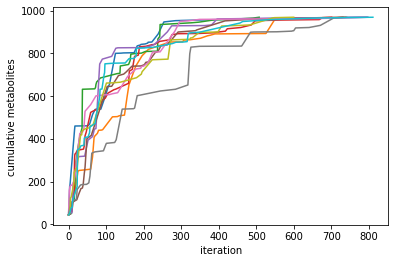

In [108]:
dfss = []
for sample,row in files.iterrows():
    fold = pd.read_csv(row.fold_file,index_col=0)
    fold['iteration'] = fold['iteration'] + 1
    rxn = pd.read_csv(row.rxn_file,index_col=0)
    cpds = pd.read_csv(row.cpd_file,index_col=0)
    cpds = cpds.drop('fold',axis=1).set_index('iteration').join(fold.set_index('iteration')).fillna('None').reset_index()
    cpds['count'] = 1
    dfs = cpds.groupby(['iteration','fold']).sum()
    dfs.columns = ['count_' + sample]
    dfss.append(dfs)
    df = cpds.groupby('iteration').sum().reset_index()[['iteration','count']]
    df['cumulative metabolites'] = df['count'].cumsum()
    sns.lineplot(x='iteration',y='cumulative metabolites',data=df)

In [109]:
dfss[0]

count_s3
iteration fold          
0         None        44
2         2486        75
3         868         59
4         216          8
16        11         256
17        12          18
51        7578         1
56        64           7
64        2006        46
71        133         24
86        3110         1
95        10          46
106       301         61
109       7543         8
114       230         46
125       7564       100
140       231          1
146       312          1
174       206          1
175       101          1
183       9           31
191       7524         4
193       607          3
204       4126         2
211       316          4
212       708          4
222       358          1
239       2004        38
254       2002        56
285       7515         6
302       7552         1
463       314          7
538       246          2
566       2484         2
795       232          4

In [110]:
g = pd.concat([y.reset_index()[['fold'] + list(y)].set_index('fold') for y in dfss],axis=1).fillna(0)

In [116]:
g.T.median().sort_values()

fold
320      0.0
141      0.0
7553     0.0
276      0.0
6076     0.0
        ... 
2002     7.0
2006    14.5
230     23.0
2004    36.5
None    44.0
Length: 183, dtype: float64

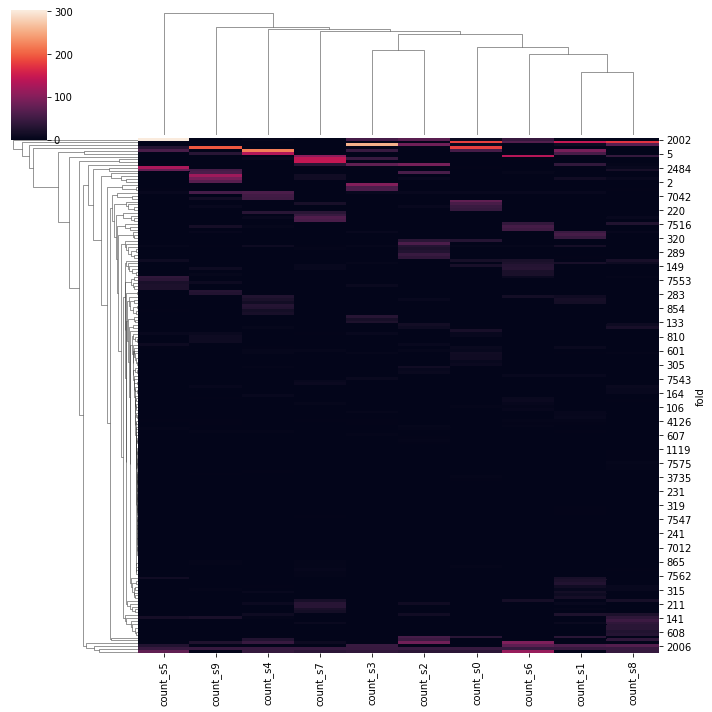

In [113]:
sns.clustermap(g)